In [1]:
import numpy as np
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
from pathlib import Path
import os

In [2]:
data = Path('./OmegaDev/Model_Z/raw_data/GBP_USD_H1_2016-01-01_2018-01-01.csv')

In [9]:
headers = ['date', 'complete', 'open', 'high', 'low', 'close', 'volume']
df = pd.read_csv(data, header=None, names=headers)
df.head()

,date,complete,open,high,low,close,volume
0,2016-01-03T22:00:00,True,1.47352,1.47464,1.47351,1.47354,1068
1,2016-01-03T23:00:00,True,1.47343,1.47382,1.47266,1.47356,938
2,2016-01-04T00:00:00,True,1.47364,1.47412,1.47240,1.47278,570
3,2016-01-04T01:00:00,True,1.47284,1.47301,1.46936,1.47177,1133
4,2016-01-04T02:00:00,True,1.47183,1.47234,1.47041,1.47184,865


In [22]:
# dropping na
df = dropna(df)

In [25]:
# adding all TAs 
# this is mainly to explore
df = add_all_ta_features(df, 'open', 'high', 'low', 'close', 'volume')

In [27]:
df.columns

Index(['date', 'complete', 'open', 'high', 'low', 'close', 'volume',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'momentum_mfi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       't

In [26]:
df.head()

,date,complete,open,high,low,close,volume,volume_adi,volume_obv,volume_cmf,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
0,2016-01-03T22:00:00,True,1.47352,1.47464,1.47351,1.47354,1068,-1011.292035,1068,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.460766,NaN,0.000000
1,2016-01-03T23:00:00,True,1.47343,1.47382,1.47266,1.47356,938,-493.774794,2006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001357,0.001357,0.001357
2,2016-01-04T00:00:00,True,1.47364,1.47412,1.47240,1.47278,570,-811.914329,1436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.052933,-0.052947,-0.051576
3,2016-01-04T01:00:00,True,1.47284,1.47301,1.46936,1.47177,1133,-448.733507,303,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.068578,-0.068601,-0.120119
4,2016-01-04T02:00:00,True,1.47183,1.47234,1.47041,1.47184,865,-31.920035,1168,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004756,0.004756,-0.115368


## Exploring

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

In [35]:
def window_pass(df, window):
    if window[0]<0 or window[0]>len(df): return False
    if window[1]>len(df) or window[1]<window[0]: return False
    return True

In [36]:
def plot_bollinger(df, window=[0, 1000]):
    if window_pass:
        df_w = df.iloc[window[0]:window[1]].copy()
        plt.plot(df_w.close)
        plt.plot(df_w.volatility_bbh, label='high bb')
        plt.plot(df_w.volatility_bbl, label='low bb')
        plt.plot(df_w.volatility_bbm, label='ema bb')
        plt.title('bollinger bands')
        plt.legend()
        plt.show()

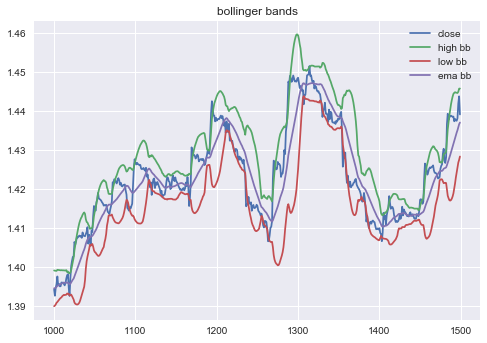

In [38]:
plot_bollinger(df, window=[1000, 1500])

In [41]:
def keltner_channel(df, window=[0, 1000]):
    if window_pass:
        df_w = df.iloc[window[0]:window[1]].copy()
        plt.plot(df_w.close)
        plt.plot(df_w.volatility_kcc, label='central kc')
        plt.plot(df_w.volatility_kch, label='high kc')
        plt.plot(df_w.volatility_kcl, label='low kc')
        plt.title('keltner channel')
        plt.legend()
        plt.show()

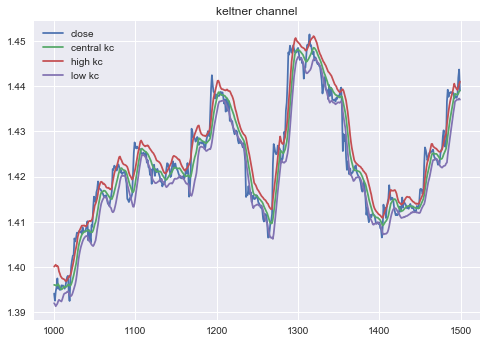

In [42]:
keltner_channel(df, window=[1000, 1500])

In [43]:
df.columns

Index(['date', 'complete', 'open', 'high', 'low', 'close', 'volume',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'momentum_mfi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       't